# Question 1

Import the necessary libraries

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

Import the dataset & Assign it to a variable called users

In [2]:
users = pd.read_csv(url, sep='|', index_col='user_id')
users

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


Discover what is the mean age per occupation

In [3]:
#  Discover what is the mean age per occupation
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Discover the Male ratio per occupation and sort it from the most to the least

In [4]:
male_female_count_by_occupation = users.groupby(["occupation", "gender"])[["gender"]].count().rename(columns={'gender':'Gender Count'}).reset_index().pivot(index="occupation", columns="gender", values="Gender Count").fillna(0)
(male_female_count_by_occupation["M"]/ (male_female_count_by_occupation["F"] + male_female_count_by_occupation["M"])).sort_values(ascending=False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

For each occupation, calculate the minimum and maximum ages

In [5]:
pd.concat([users.groupby("occupation")[["age"]].min().rename(columns={'age':'Minimum Age'}),users.groupby("occupation")[["age"]].max().rename(columns={'age':'Maximum Age'})],axis=1)

,Minimum Age,Maximum Age
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


For each combination of occupation and sex, calculate the mean age

In [6]:
users.groupby(["occupation","gender"])[["age"]].mean().rename(columns={'age':'Mean Age'}).reset_index().pivot(index="occupation",columns="gender",values="Mean Age")


gender,F,M
occupation,,
administrator,40.638889,37.162791
artist,30.307692,32.333333
doctor,NaN,43.571429
educator,39.115385,43.101449
engineer,29.500000,36.600000
entertainment,31.000000,29.000000
executive,44.000000,38.172414
healthcare,39.818182,45.400000
homemaker,34.166667,23.000000


For each occupation present the percentage of women and men

In [7]:
male_percentage = (male_female_count_by_occupation["M"] / (male_female_count_by_occupation["F"] + male_female_count_by_occupation["M"])) * 100
pd.concat([male_percentage.rename("Male",inplace=True), (100 - male_percentage).rename("Female",inplace=True)], axis=1)

,Male,Female
occupation,,
administrator,54.430380,45.569620
artist,53.571429,46.428571
doctor,100.000000,0.000000
educator,72.631579,27.368421
engineer,97.014925,2.985075
entertainment,88.888889,11.111111
executive,90.625000,9.375000
healthcare,31.250000,68.750000
homemaker,14.285714,85.714286


# Question 2

Import the necessary libraries

In [8]:
import pandas as pd
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'

Import the dataset & Assign it to a variable called euro12

In [9]:
euro12 = pd.read_csv(url, sep=',')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


Select only the Goal column

In [10]:
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

How many team participated in the Euro2012

In [11]:
euro12.Team.count()

16

What is the number of columns in the dataset

In [12]:
len(euro12.columns)

35

View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [13]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


Sort the teams by Red Cards, then to Yellow Cards

In [14]:
discipline.sort_values(['Red Cards', 'Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


Calculate the mean Yellow Cards given per Team

In [15]:
discipline['Yellow Cards'].mean()

7.4375

Filter teams that scored more than 6 goalsStep

In [16]:
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


Select the teams that start with G

In [17]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Select the first 7 columns

In [18]:
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


Select all columns except the last 3

In [19]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Present only the Shooting Accuracy from England, Italy and Russia

In [20]:
euro12[euro12.Team.isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3


Import the necessary libraries


In [21]:
import pandas as pd
import numpy as np

Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000

In [22]:
series1 = pd.Series(np.random.randint(low=1, high=5, size=100 ))
series2 = pd.Series(np.random.randint(low=1, high=4, size=100 ))
series3 = pd.Series(np.random.randint(low=10000, high=30001, size=100))
series1,series2,series3

(0     1
 1     4
 2     2
 3     1
 4     1
      ..
 95    1
 96    2
 97    2
 98    4
 99    3
 Length: 100, dtype: int64,
 0     2
 1     3
 2     2
 3     1
 4     1
      ..
 95    2
 96    3
 97    1
 98    2
 99    2
 Length: 100, dtype: int64,
 0     24137
 1     29006
 2     15367
 3     16852
 4     26409
       ...  
 95    17400
 96    16432
 97    25685
 98    11055
 99    12212
 Length: 100, dtype: int64)

Create a DataFrame by joinning the Series by column

In [23]:
data_frame = pd.concat([series1, series2, series3], axis=1)
data_frame

,0,1,2
0,1,2,24137
1,4,3,29006
2,2,2,15367
3,1,1,16852
4,1,1,26409
...,...,...,...
95,1,2,17400
96,2,3,16432
97,2,1,25685
98,4,2,11055


Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [24]:
data_frame.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
data_frame

,bedrs,bathrs,price_sqr_meter
0,1,2,24137
1,4,3,29006
2,2,2,15367
3,1,1,16852
4,1,1,26409
...,...,...,...
95,1,2,17400
96,2,3,16432
97,2,1,25685
98,4,2,11055


Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [25]:
bigcolumn = pd.concat([series1, series2, series3], axis=0).to_frame()
bigcolumn

,0
0,1
1,4
2,2
3,1
4,1
...,...
95,17400
96,16432
97,25685
98,11055


Ops it seems it is going only until index 99. Is it true?

In [26]:
bigcolumn.index
# No It's not true as dataframe length is 300

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64', length=300)

Reindex the DataFrame so it goes from 0 to 299

In [27]:
bigcolumn.reset_index(drop=True)

,0
0,1
1,4
2,2
3,1
4,1
...,...
295,17400
296,16432
297,25685
298,11055


# Question 4

Import the necessary libraries


In [28]:
import pandas as pd
import numpy as np

Import the dataset from the attached file wind.txt & Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.

In [29]:
data = pd.read_csv('data/wind.txt', sep='\s+') # Read in data
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1)) # Create date column
data = data.drop(columns=["Yr","Mo","Dy"]) # Remove unneeded columns
data.head() # Examine first few rows of data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [30]:
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000,data.Date,data.Date - pd.offsets.DateOffset(years=100))
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns]

In [31]:
data = data.set_index("Date")
data.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [32]:
data.isna().sum().sum()

31

7. Compute how many non-missing values there are in total.

In [33]:
data.count().sum()

78857

8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.

In [34]:
data.mean().mean()

10.227982360836938

Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days. A different set of numbers for each location.

In [35]:
loc_stats = pd.DataFrame()
loc_stats["min","max"] = data.min()
loc_stats["max"] = data.max()
loc_stats["mean"] = data.mean()
loc_stats["std"] = data.std()
loc_stats

,"(min, max)",max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at  each day. A different set of numbers for each day.

In [36]:
day_stats = pd.DataFrame()
day_stats["min"] = data.min(axis=1)
day_stats["max"] = data.max(axis=1)
day_stats["mean"] = data.mean(axis=1)
day_stats["std"] = data.std(axis=1)
day_stats

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

In [37]:
data[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

Downsample the record to a yearly frequency for each location.

In [38]:
data.resample("Y").mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


Downsample the record to a monthly frequency for each location.

In [39]:
data.resample("M").mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


Downsample the record to a weekly frequency for each location.

In [40]:
data.resample("W").mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [41]:
def resample_data(data_values, frequency):
    return data_values.resample(frequency).mean()

def describe_data(data_values):
    return data_values.apply(lambda x: x.describe())

def resample_and_describe(data_values, frequency):
    return describe_data(resample_data(data_values, frequency))

resample_and_describe(data, 'W')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,940.000000,940.000000,940.000000,940.000000,939.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,12.365304,10.647725,11.661255,6.309334,10.455607,7.094787,9.801271,8.496123,8.496452,8.710639,13.125912,15.597171
std,3.466600,3.372501,2.840361,2.186432,3.146715,2.556633,3.308180,2.853029,2.638349,2.924546,3.757189,4.468526
min,3.874286,2.452857,4.901429,1.447143,2.775714,1.382857,2.471429,2.284286,2.262857,1.571429,3.661429,5.124286
25%,9.884286,8.277857,9.613929,4.742857,8.248571,5.211071,7.432500,6.470000,6.589286,6.530000,10.346429,12.269286
50%,12.291429,10.486429,11.490000,6.165714,10.254286,6.933571,9.603571,8.358571,8.394286,8.490000,12.846429,15.330714
75%,14.547143,12.757857,13.457143,7.584286,12.627143,8.842500,11.942143,10.457500,10.108571,10.699643,15.513571,18.683929
max,24.010000,23.715714,21.384286,14.517143,22.897143,16.010000,20.474286,17.861429,17.460000,17.932857,26.617143,30.374286


# Question 5

Import the necessary libraries

In [42]:
import pandas as pd
import numpy as np

Import the dataset & Assign it to a variable called chipo.

In [43]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep = '\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


See the first 10 entries

In [44]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


What is the number of observations in the dataset?

In [45]:
chipo.shape[0]

4622

What is the number of columns in the dataset?

In [46]:
chipo.shape[1]

5

Print the name of all the columns.

In [47]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

How is the dataset indexed?

In [48]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Which was the most-ordered item?

In [49]:
chipo['item_name'].mode()

0    Chicken Bowl
Name: item_name, dtype: object

For the most-ordered item, how many items were ordered?

In [50]:
chipo[chipo['item_name'] == chipo['item_name'].mode()[0]].quantity.sum()

761

What was the most ordered item in the choice_description column?

In [51]:
chipo['choice_description'].mode()


0    [Diet Coke]
Name: choice_description, dtype: object

How many items were orderd in total?

In [52]:
chipo['quantity'].sum()


4972

• Turn the item price into a float
• Check the item price type


In [53]:
# Turn the item price into a float
chipo['item_price'] = chipo['item_price'].replace({"\$": ""}, regex= True).astype(float)
# Check the item price type
chipo['item_price'].dtype

dtype('float64')

• Create a lambda function and change the type of item price
• Check the item price type

In [54]:
# Create a lambda function and change the type of item price
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))
# Check the item price type
chipo['item_price'].dtype

dtype('float64')

How much was the revenue for the period in the dataset?

In [55]:
(chipo['quantity'] * chipo['item_price']).sum()

39237.02

How many orders were made in the period?

In [56]:
chipo['order_id'].value_counts().count()


1834

What is the average revenue amount per order?

In [57]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
chipo.groupby('order_id').sum(numeric_only=True).mean()['revenue']

21.39423118865867

How many different items are sold?

In [58]:
chipo['item_name'].nunique()

50

# Question 6

Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
marriages_data = pd.read_csv('data/us-marriages-divorces-1867-2014.csv')

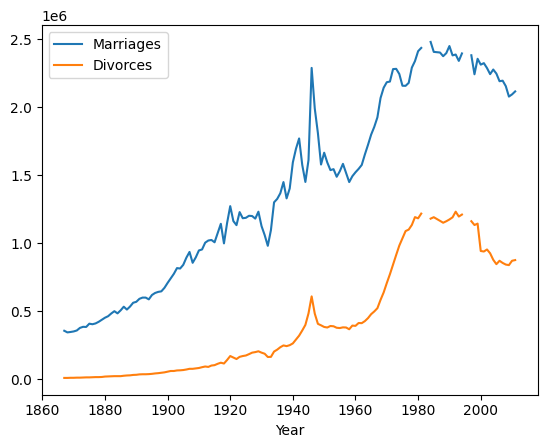

In [61]:
marriages_data.plot(x='Year', y=['Marriages', 'Divorces'])
plt.show()

# Question 7

In [62]:
marriages_data = pd.read_csv('data/us-marriages-divorces-1867-2014.csv')


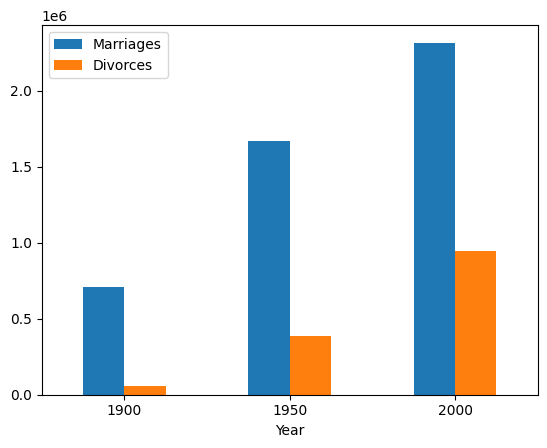

In [63]:
df = marriages_data[marriages_data['Year'].isin([1900, 1950, 2000])]
df.plot.bar(x='Year', y=['Marriages', 'Divorces'], rot=0)
plt.show()

# Question 8

In [64]:
actor_kill_counts = pd.read_csv('data/actor_kill_counts.csv')


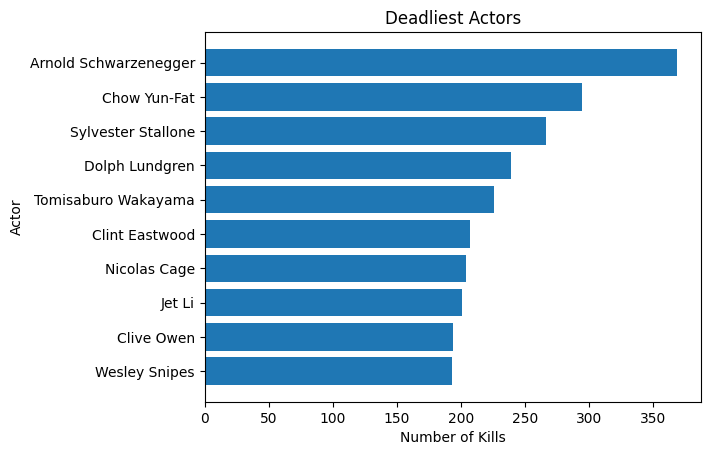

In [65]:
actor_kill_counts.sort_values('Count', inplace=True)
plt.barh(range(len(actor_kill_counts)), actor_kill_counts['Count'], tick_label=actor_kill_counts['Actor'])
plt.title('Deadliest Actors')
plt.xlabel('Number of Kills')
plt.ylabel('Actor')
plt.show()

# Question 9

In [66]:
roman_emperor_reigns = pd.read_csv('data/roman-emperor-reigns.csv')


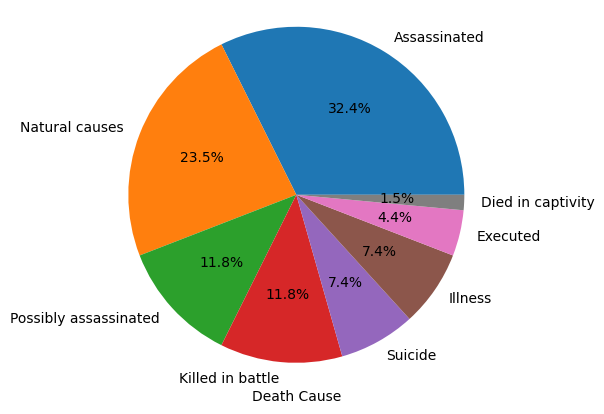

In [67]:
roman_emperor_reigns_plot = roman_emperor_reigns['Cause_of_Death'].value_counts().plot(kind='pie', autopct='%1.1f%%')
roman_emperor_reigns_plot.axis('equal')
roman_emperor_reigns_plot.set_xlabel('Death Cause')
roman_emperor_reigns_plot.set_ylabel('')

plt.show()

# Question 10

In [68]:
arcade_revenue_vs_cs_doctorates = pd.read_csv('data/arcade-revenue-vs-cs-doctorates.csv')


<AxesSubplot: xlabel='Computer Science Doctorates Awarded (US)', ylabel='Total Arcade Revenue (billions)'>

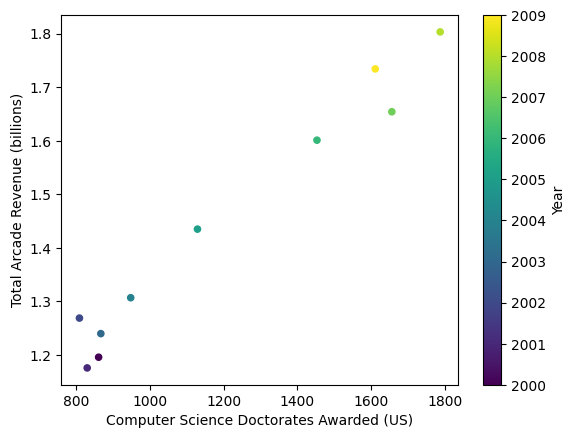

In [69]:
arcade_revenue_vs_cs_doctorates.plot(kind='scatter', x='Computer Science Doctorates Awarded (US)', y='Total Arcade Revenue (billions)', c='Year', colormap='viridis')
